<a href="https://colab.research.google.com/github/mgarbanzo/GOESR_Fundamentos/blob/main/GOES_R_FUNDAMENTOS_L2_Mapeador_Global_de_Rayeria_(GLM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

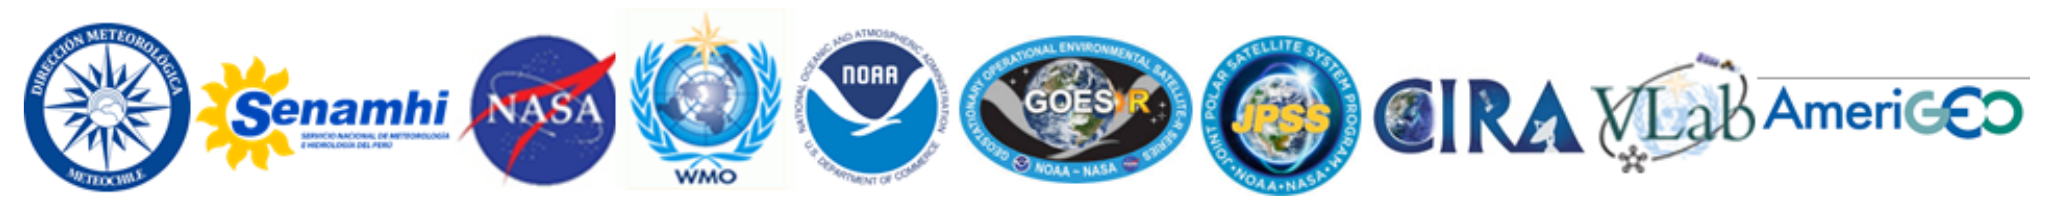

# Práctica de Python en la nube para generar el producto del GLM de GOES 16

##Taller‌ ‌Virtual‌ ‌sobre‌ ‌Aplicaciones‌ ‌Satelitales‌ ‌OMM‌ ‌AR-III‌ ‌

La **meta de aprendizaje** para este cuaderno es comprender como se leen,extraen y grafican los datos de un archivo generado por el instrumento SUVI del satélite GOES-16.

Nivel Intermedio


# Primero debemos obtener la información para visualizar.

Descargamos los datos ejecutando las siguiente casilla de código:

In [14]:
!wget https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2021/311/18/OR_GLM-L2-LCFA_G16_s20213111800000_e20213111800200_c20213111800222.nc


--2021-11-08 14:52:57--  https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2021/311/18/OR_GLM-L2-LCFA_G16_s20213111800000_e20213111800200_c20213111800222.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.244.92
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.244.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309291 (302K) [binary/octet-stream]
Saving to: ‘OR_GLM-L2-LCFA_G16_s20213111800000_e20213111800200_c20213111800222.nc’

OR_GLM-L2-LCFA_G16_ 100%[===================>] 302.04K  --.-KB/s    in 0.02s   

2021-11-08 14:52:57 (14.5 MB/s) - ‘OR_GLM-L2-LCFA_G16_s20213111800000_e20213111800200_c20213111800222.nc’ saved [309291/309291]



In [15]:
!pip install folium

Una vez instalada, se puede incorporar en Python junto a otras librería útiles para visualización y manipulación de arreglos de números:

In [3]:
import pylab as plt
from netCDF4 import Dataset                
import matplotlib.pyplot as plt           
#import cartopy, cartopy.crs as ccrs      
import numpy as np                      
from datetime import datetime
import matplotlib as mpl
import folium
from folium import plugins, FeatureGroup

# Asignar el metadato a los datos es simple y rápido

En la casilla siguiente se utiliza el comando Dataset de la librería NetCDF4 para cargar los metadatos a las variables.

El GLM genera información de Eventos, Grupos y Flases detectados en un lapso de 20 segundos. En los comandos siguientes se leen todos los datos de posición (lat y lon) así como energía. Para los grupos y flases se puede obtener también una estimación del área.



In [16]:
# Se abre la imagen del GOES-16 para obtener información
GLM = Dataset("/content/OR_GLM-L2-LCFA_G16_s20213111800000_e20213111800200_c20213111800222.nc", 'r')

event_energy = GLM.variables['event_energy'][:]
event_lat = GLM.variables['event_lat'][:]
event_lon = GLM.variables['event_lon'][:]

group_energy = GLM.variables['group_energy'][:]
group_area = GLM.variables['group_area'][:]
group_lat = GLM.variables['group_lat'][:]
group_lon = GLM.variables['group_lon'][:]

flash_energy = GLM.variables['flash_energy'][:]
flash_area = GLM.variables['flash_area'][:]
flash_lat = GLM.variables['flash_lat'][:]
flash_lon = GLM.variables['flash_lon'][:]


# Comandos opcionales para limitar el área

En el siguiente comando se puede limitar el área a utilizar para la graficación de los datos. Esto es útil principalmente debido al tamaño del archivo final.

Si quiere observar TODA la información detectada por el GLM en el globo **debe ignorar los siguientes comandos y no ejecutarlos** y lo puede hacer al establecer la siguiente variable como cierta o falsa:


In [17]:
limitaAreaGeografica = False

In [18]:
if limitaAreaGeografica:
  # Modifique estos valores si le interesa limitar la región a su país.
  latmin = 0.0
  latmax = 30
  lonmin = -70
  lonmax = -100

  ILat = np.multiply(event_lat > latmin, event_lat < latmax)
  event_lat = event_lat[ILat]
  event_lon = event_lon[ILat]
  event_energy = event_energy[ILat]
  ILon = np.multiply(event_lon < lonmin, event_lon > lonmax)
  event_lat = event_lat[ILon]
  event_lon = event_lon[ILon]
  event_energy = event_energy[ILon]

  ILat = np.multiply(group_lat > latmin, group_lat < latmax)
  group_energy = group_energy[ILat]
  group_area = group_area[ILat]
  group_lat = group_lat[ILat]
  group_lon = group_lon[ILat]
  ILon = np.multiply(group_lon < lonmin, group_lon > lonmax)
  group_energy = group_energy[ILon]
  group_area = group_area[ILon]
  group_lat = group_lat[ILon]
  group_lon = group_lon[ILon]

  ILat = np.multiply(flash_lat > latmin, flash_lat < latmax)
  flash_energy = flash_energy[ILat]
  flash_area = flash_area[ILat]
  flash_lat = flash_lat[ILat]
  flash_lon = flash_lon[ILat]
  ILon = np.multiply(flash_lon < lonmin, flash_lon > lonmax)
  flash_energy = flash_energy[ILon]
  flash_area = flash_area[ILon]
  flash_lat = flash_lat[ILon]
  flash_lon = flash_lon[ILon]

# Sección de graficación de datos y generación de producto

Se utiliza la librería **folium** para generar el mapa llamado mapaFinal.

Luego existen tres variables:

* incluirEventos
* incluirGrupos
* incluirFlashes

que pueden tomar de valores True o False. El valor de **True** genera que se incluyan esos datos en el producto final, el valor de **False** causa que esos datos sean excluidos del mapa final.

Al final se puede modificar el nombre del archivo de salida reemplazando **NombreFinaldelProducto** con un nombre específico.



In [19]:
mapaFinal = folium.Map(
    location=[10, -84],
    tiles='cartodbpositron',
    zoom_start=8,
    control_scale=True
)

incluirEventos = True
incluirGrupos = True
incluirFlashes = True

if incluirEventos:
  for i in range(len(event_energy)):
      folium.CircleMarker(
          location=[event_lat[i], event_lon[i]],
          radius=5,
          popup='Rayo Detectado',
          color='#FFD700',
          fill=True,
          fill_color='#FFD700'
      ).add_to(mapaFinal)

if incluirGrupos:
  for i in range(len(group_energy)):
      folium.CircleMarker(
          location=[group_lat[i], group_lon[i]],
          #radius=np.int(group_area[i])/500,
          radius=8,
          popup='Zona de alta actividad',
          color='#FF4500',
          fill=True,
          fill_color='#FF4500'
      ).add_to(mapaFinal)

if incluirFlashes:
  for i in range(len(flash_energy)):
      folium.Marker(
      location=[flash_lat[i], flash_lon[i]],
      popup="Energía: "+str(flash_energy[i])+" J",
      icon=folium.Icon(color='red', icon='cloud')
      ).add_to(mapaFinal)

mapaFinal.save('NombreFinaldelProducto.html')


**Descargue** el archivo generado para que pueda observarlo en su máxima resolución.

# Más allá de los datos básicos del GLM

A continuación se incluyen los histogramas de los datos de Energía y Área para los productos del GLM.

In [20]:
GLM.variables['event_energy']

<class 'netCDF4._netCDF4.Variable'>
int16 event_energy(number_of_events)
    _FillValue: -1
    long_name: GLM L2+ Lightning Detection: event radiant energy
    standard_name: lightning_radiant_energy
    _Unsigned: true
    scale_factor: 1.9024e-17
    add_offset: 2.8515e-16
    units: J
    coordinates: event_parent_group_id event_id lightning_wavelength event_time_offset event_lat event_lon
    grid_mapping: goes_lat_lon_projection
    cell_methods: lightning_wavelength: sum event_time_offset: point (sensor pixels have 2 ms integration time) area: sum (interval: 8 km comment: resolution of sensor data at nadir, filtered events only) where cloud
unlimited dimensions: number_of_events
current shape = (6076,)
filling on

(array([140.,  41.,  19.,  16.,  10.,   5.,   8.,   1.,   3.,   2.,   3.,
          1.,   1.,   0.,   1.,   2.,   0.,   2.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([5.2851298e-15, 6.4344892e-14, 1.2340465e-13, 1.8246441e-13,
        2.4152417e-13, 3.0058394e-13, 3.5964368e-13, 4.1870346e-13,
        4.7776323e-13, 5.3682297e-13, 5.9588272e-13, 6.5494252e-13,
        7.1400226e-13, 7.7306201e-13, 8.3212181e-13, 8.9118155e-13,
        9.5024130e-13, 1.0093010e-12, 1.0683608e-12, 1.1274205e-12,
        1.1864804e-12, 1.2455401e-12, 1.3045999e-12, 1.3636596e-12,
        1.4227194e-12, 1.4817791e-12, 1.5408390e-12, 1.5998987e-12,
        1.6589585e-12, 1.7180182e-12, 1.7770779e-12, 1.8361378e-12,
        1.8951975e-12, 1.9542573e-12, 2.0133170e-12, 2.0723768e-12,
        2.1314365e-12, 2.1904963e-12, 2.249556

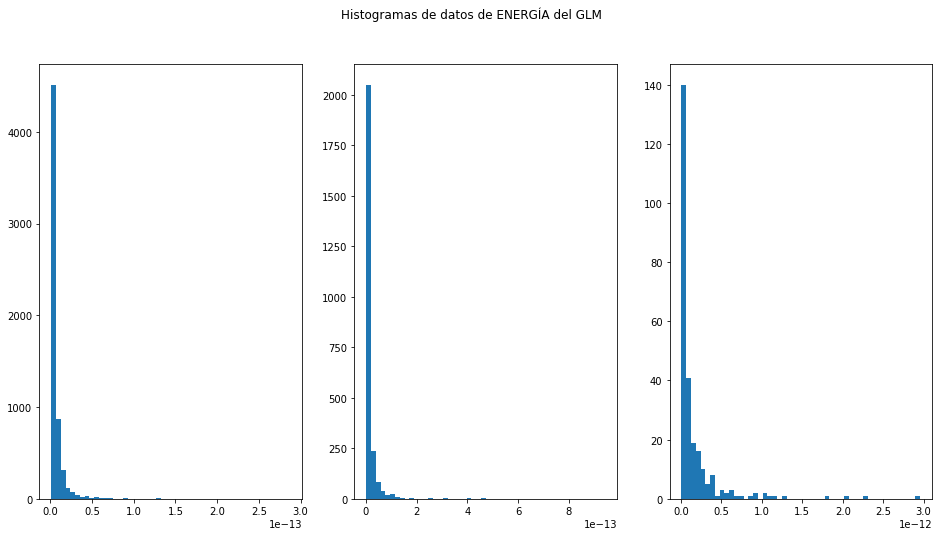

In [21]:
fig, [ax0, ax1, ax2] = plt.subplots(1,3,figsize=(16,8))
fig.suptitle('Histogramas de datos de ENERGÍA del GLM')
ax0.hist(event_energy,bins=50)
ax1.hist(group_energy,bins=50)
ax2.hist(flash_energy,bins=50)

In [22]:
GLM.variables['group_area']

<class 'netCDF4._netCDF4.Variable'>
int16 group_area(number_of_groups)
    _FillValue: -1
    long_name: GLM L2+ Lightning Detection: group area coverage (pixels containing at least one constituent event only)
    _Unsigned: true
    valid_range: [ 0 -6]
    scale_factor: 152601.86
    add_offset: 0.0
    units: m2
    coordinates: group_parent_flash_id event_parent_group_id group_id lightning_wavelength group_time_threshold group_time_offset group_lat group_lon
    grid_mapping: goes_lat_lon_projection
    cell_methods: lightning_wavelength: sum group_time_offset: mean (times of occurrence of group's constituent events defined by variable event_parent_group_id) area: sum (interval: 8 km comment: resolution of sensor data at nadir, adjacent pixels only, including the diagonal, in sensor focal plane array) where cloud
unlimited dimensions: number_of_groups
current shape = (2494,)
filling on

(array([42., 51., 26., 29., 29., 12., 14.,  7.,  4.,  8.,  4.,  3.,  5.,
         2.,  4.,  1.,  3.,  3.,  1.,  1.,  0.,  0.,  1.,  2.,  0.,  2.,
         1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([6.4245384e+07, 1.1667328e+08, 1.6910118e+08, 2.2152907e+08,
        2.7395696e+08, 3.2638486e+08, 3.7881277e+08, 4.3124067e+08,
        4.8366854e+08, 5.3609645e+08, 5.8852435e+08, 6.4095226e+08,
        6.9338016e+08, 7.4580806e+08, 7.9823590e+08, 8.5066381e+08,
        9.0309171e+08, 9.5551962e+08, 1.0079475e+09, 1.0603754e+09,
        1.1128033e+09, 1.1652312e+09, 1.2176591e+09, 1.2700870e+09,
        1.3225149e+09, 1.3749428e+09, 1.4273706e+09, 1.4797985e+09,
        1.5322264e+09, 1.5846543e+09, 1.6370822e+09, 1.6895101e+09,
        1.7419380e+09, 1.7943660e+09, 1.8467939e+09, 1.8992218e+09,
        1.9516497e+09, 2.0040776e+09, 2.0565055e+09, 2.1089334e+09,
        2.1613612e+09, 2.2137892e+09

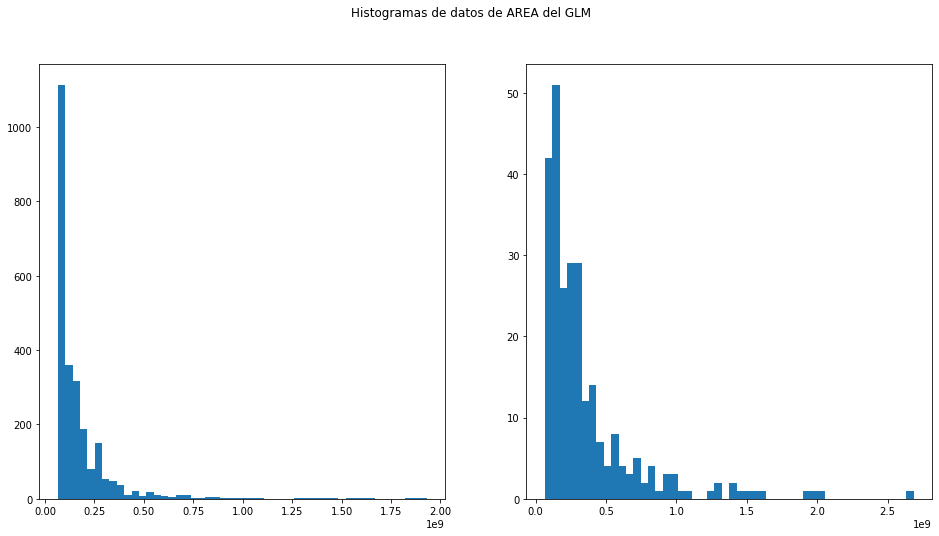

In [23]:
fig, [ax0, ax1] = plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Histogramas de datos de AREA del GLM')
ax0.hist(group_area,bins=50)
ax1.hist(flash_area,bins=50)